Use the seed 0 everywhere.

1. Import MNIST data as we did in Lecture 7. We are only going to use digits 0 and 1. So extract only those examples and discard the rest.

Next, randomly split the data into 80% training data and 20% testing data. Keep this split fixed throughout the experiments.

2. For each K in Ks=[10,20,30], follow the steps in the lecture:

Step 1.
Cluster the training set into K clusters.
Then for each cluster, find the image closest to the centroid, called the representative images.
Plot the K representative images and manually label these images.
Train Logistic Regression with K training examples.
Report the training and the test accuracy.

Step 2.
Assign the labels of all instances based on the labels of the cluster centers (i.e., representative images).
Train Logistic Regression with all training data using the propagated labels.
Report the training and the test accuracy.

3. Comment on the observed performance for the different values of K. [Can Ignore]

##Importing Libraries

In [32]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Reading in Data

In [33]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [34]:
# Split data into features and labels
X_raw = mnist["data"]
y_raw = mnist["target"]

# Filter out only 1 and 0 images
indices = [i for i in range(0, len(y_raw)) if (mnist["target"][i] == '0' or mnist["target"][i] == '1')]

X = X_raw[indices]
y = y_raw[indices]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [35]:
def dist(vect1, vect2):
  return np.linalg.norm(vect1 - vect2)

## K = 10

In [36]:
# Create kmeans classifier
kmeans_10 = KMeans(n_clusters = 10, random_state = 0)
y_pred = kmeans_10.fit_predict(X_train)
centroids = kmeans_10.cluster_centers_

rep_images_10 = []
# Find centroids, representative images
for c in centroids:
    dists = [dist(c, i) for i in X_train]
    rep = np.argmin(dists)
    rep_images_10.append([X_train[rep], rep])


[0, 0, 1, 1, 0, 1, 0, 0, 1, 0]


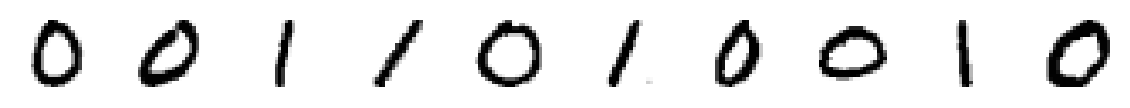

In [37]:
# Plot representative images
fig, ax = plt.subplots(1,10, figsize = (20,10))
for i in range(len(rep_images_10)):
  image = rep_images_10[i][0].reshape(28, 28)
  ax[i].imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
  ax[i].axis("off") 

rep_images_10_y = [int(y_train[i[1]]) for i in rep_images_10]

print(rep_images_10_y)

In [38]:
log_reg_10_simple = LogisticRegression()
rep_images_10_set = [i[0] for i in rep_images_10]

# Train logistic regression just on centroids alone
log_reg_10_simple.fit(rep_images_10_set, rep_images_10_y)
train_accuracy_10_simple = log_reg_10_simple.score(X_train, [int(k) for k in y_train])
test_accuracy_10_simple = log_reg_10_simple.score(X_test, [int(k) for k in y_test])

print("Training Accuracy:",train_accuracy_10_simple, "Test Accuracy:", test_accuracy_10_simple)

Training Accuracy: 0.9965324763193505 Test Accuracy: 0.9962787550744249


In [39]:
rep_images_10_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(10):
  rep_images_10_propagated[kmeans_10.labels_ == i] = rep_images_10_y[i]

log_reg_10_prop = LogisticRegression()
log_reg_10_prop.fit(X_train, rep_images_10_propagated)

train_accuracy_10_prop = log_reg_10_prop.score(X_train, [int(k) for k in y_train])
test_accuracy_10_prop = log_reg_10_prop.score(X_test, [int(k) for k in y_test])
print("Training Accuracy:",train_accuracy_10_prop, "Test Accuracy:", test_accuracy_10_prop)

Training Accuracy: 0.9978856562922869 Test Accuracy: 0.9979702300405954


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K = 20

In [40]:
# Create kmeans classifier
kmeans_20 = KMeans(n_clusters = 20, random_state = 0)
y_pred = kmeans_20.fit_predict(X_train)
centroids = kmeans_20.cluster_centers_

rep_images_20 = []
# Find centroids, representative images
for c in centroids:
    dists = [dist(c, i) for i in X_train]
    rep = np.argmin(dists)
    rep_images_20.append([X_train[rep], rep])


[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


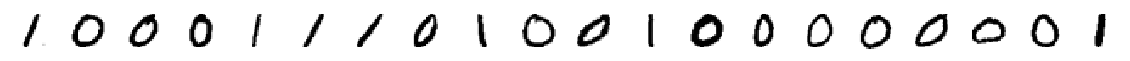

In [41]:
# Plot representative images
fig, ax = plt.subplots(1,20, figsize = (20,10))
for i in range(len(rep_images_20)):
  image = rep_images_20[i][0].reshape(28, 28)
  ax[i].imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
  ax[i].axis("off") 

rep_images_20_y = [int(y_train[i[1]]) for i in rep_images_20]

print(rep_images_20_y)

In [42]:
log_reg_20_simple = LogisticRegression()
rep_images_20_set = [i[0] for i in rep_images_20]

# Train logistic regression just on centroids alone
log_reg_20_simple.fit(rep_images_20_set, rep_images_20_y)
train_accuracy_20_simple = log_reg_20_simple.score(X_train, [int(k) for k in y_train])
test_accuracy_20_simple = log_reg_20_simple.score(X_test, [int(k) for k in y_test])

print("Training Accuracy:",train_accuracy_20_simple, "Test Accuracy:", test_accuracy_20_simple)

Training Accuracy: 0.9972936400541272 Test Accuracy: 0.9969553450608931


In [43]:
rep_images_20_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(20):
  rep_images_20_propagated[kmeans_20.labels_ == i] = rep_images_20_y[i]

log_reg_20_prop = LogisticRegression()
log_reg_20_prop.fit(X_train, rep_images_20_propagated)

train_accuracy_20_prop = log_reg_20_prop.score(X_train, [int(k) for k in y_train])
test_accuracy_20_prop = log_reg_20_prop.score(X_test, [int(k) for k in y_test])
print("Training Accuracy:",train_accuracy_20_prop, "Test Accuracy:", test_accuracy_20_prop)

Training Accuracy: 0.9983085250338295 Test Accuracy: 0.9979702300405954


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K = 30

In [44]:
# Create kmeans classifier
kmeans_30 = KMeans(n_clusters = 30, random_state = 0)
y_pred = kmeans_30.fit_predict(X_train)
centroids = kmeans_30.cluster_centers_

rep_images_30 = []
# Find centroids, representative images
for c in centroids:
    dists = [dist(c, i) for i in X_train]
    rep = np.argmin(dists)
    rep_images_30.append([X_train[rep], rep])


[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]


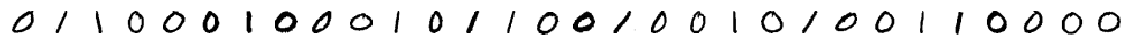

In [45]:
# Plot representative images
fig, ax = plt.subplots(1,30, figsize = (20,10))
for i in range(len(rep_images_30)):
  image = rep_images_30[i][0].reshape(28, 28)
  ax[i].imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
  ax[i].axis("off") 

rep_images_30_y = [int(y_train[i[1]]) for i in rep_images_30]

print(rep_images_30_y)

In [46]:
log_reg_30_simple = LogisticRegression()
rep_images_30_set = [i[0] for i in rep_images_30]

# Train logistic regression just on centroids alone
log_reg_30_simple.fit(rep_images_30_set, rep_images_30_y)
train_accuracy_30_simple = log_reg_30_simple.score(X_train, [int(k) for k in y_train])
test_accuracy_30_simple = log_reg_30_simple.score(X_test, [int(k) for k in y_test])

print("Training Accuracy:",train_accuracy_30_simple, "Test Accuracy:", test_accuracy_30_simple)

Training Accuracy: 0.9968707713125846 Test Accuracy: 0.9972936400541272


##Discuss Results

*As the number of clusters increases, the test and training accuracy both generally improve. The models with propagated labels also outperform the models that are trained only directly on the representative labels, but not by much, probably because the labels are propagated to the entire cluster instead of just the closest ones which is probably mis-labelling elements.*